In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import copy



## Reading data

In [2]:
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income'
]
df = pd.read_csv("./data/adult.data",  delimiter=",", names=columns)

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
print(df["native_country"].value_counts())

native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [7]:
# native_country_counts = df["native_country"].value_counts() 
# indices = native_country_counts > 50

# users_to_keep = list(np.array(native_country_counts.index.values)[np.array(indices)])
# print(users_to_keep)

In [8]:
# df = df.loc[df['native_country'].isin(users_to_keep)]

In [9]:
print(df["workclass"].value_counts())
print(df["education"].value_counts())
print(df["marital_status"].value_counts())
print(df["relationship"].value_counts())
print(df["race"].value_counts())
print(df["sex"].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
relationship
 Husband           13193
 Not-in-family

In [10]:
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital_status'] = df['marital_status'].str.strip()
df['occupation'] = df['occupation'].str.strip()
df['relationship'] = df['relationship'].str.strip()
df['race'] = df['race'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native_country'] = df['native_country'].str.strip()
df['income'] = df['income'].str.strip()

In [11]:
df = df[ df['native_country'] != '?']
df = df[ df['occupation'] != '?']
df = df[ df['workclass'] != '?']

In [12]:
print(df['age'].value_counts())
print(df['fnlwgt'].value_counts())
print(df['education_num'].value_counts())
print(df['capital_gain'].value_counts())
print(df['capital_loss'].value_counts())
print(df['hours_per_week'].value_counts())

age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64
fnlwgt
203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: count, Length: 20263, dtype: int64
education_num
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: count, dtype: int64
capital_gain
0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: count, Length: 118, dtype: int64
capital_loss
0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: count, Length: 90, dtype: int64
hours_per_week
40  

In [13]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [14]:
df["income"] = df["income"].replace(to_replace=["<=50K", ">50K"], value=[0, 1])


In [15]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [16]:
def plot_frequency_distribution(column, ax):
    sns.histplot(df[column], kde=True, ax=ax)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

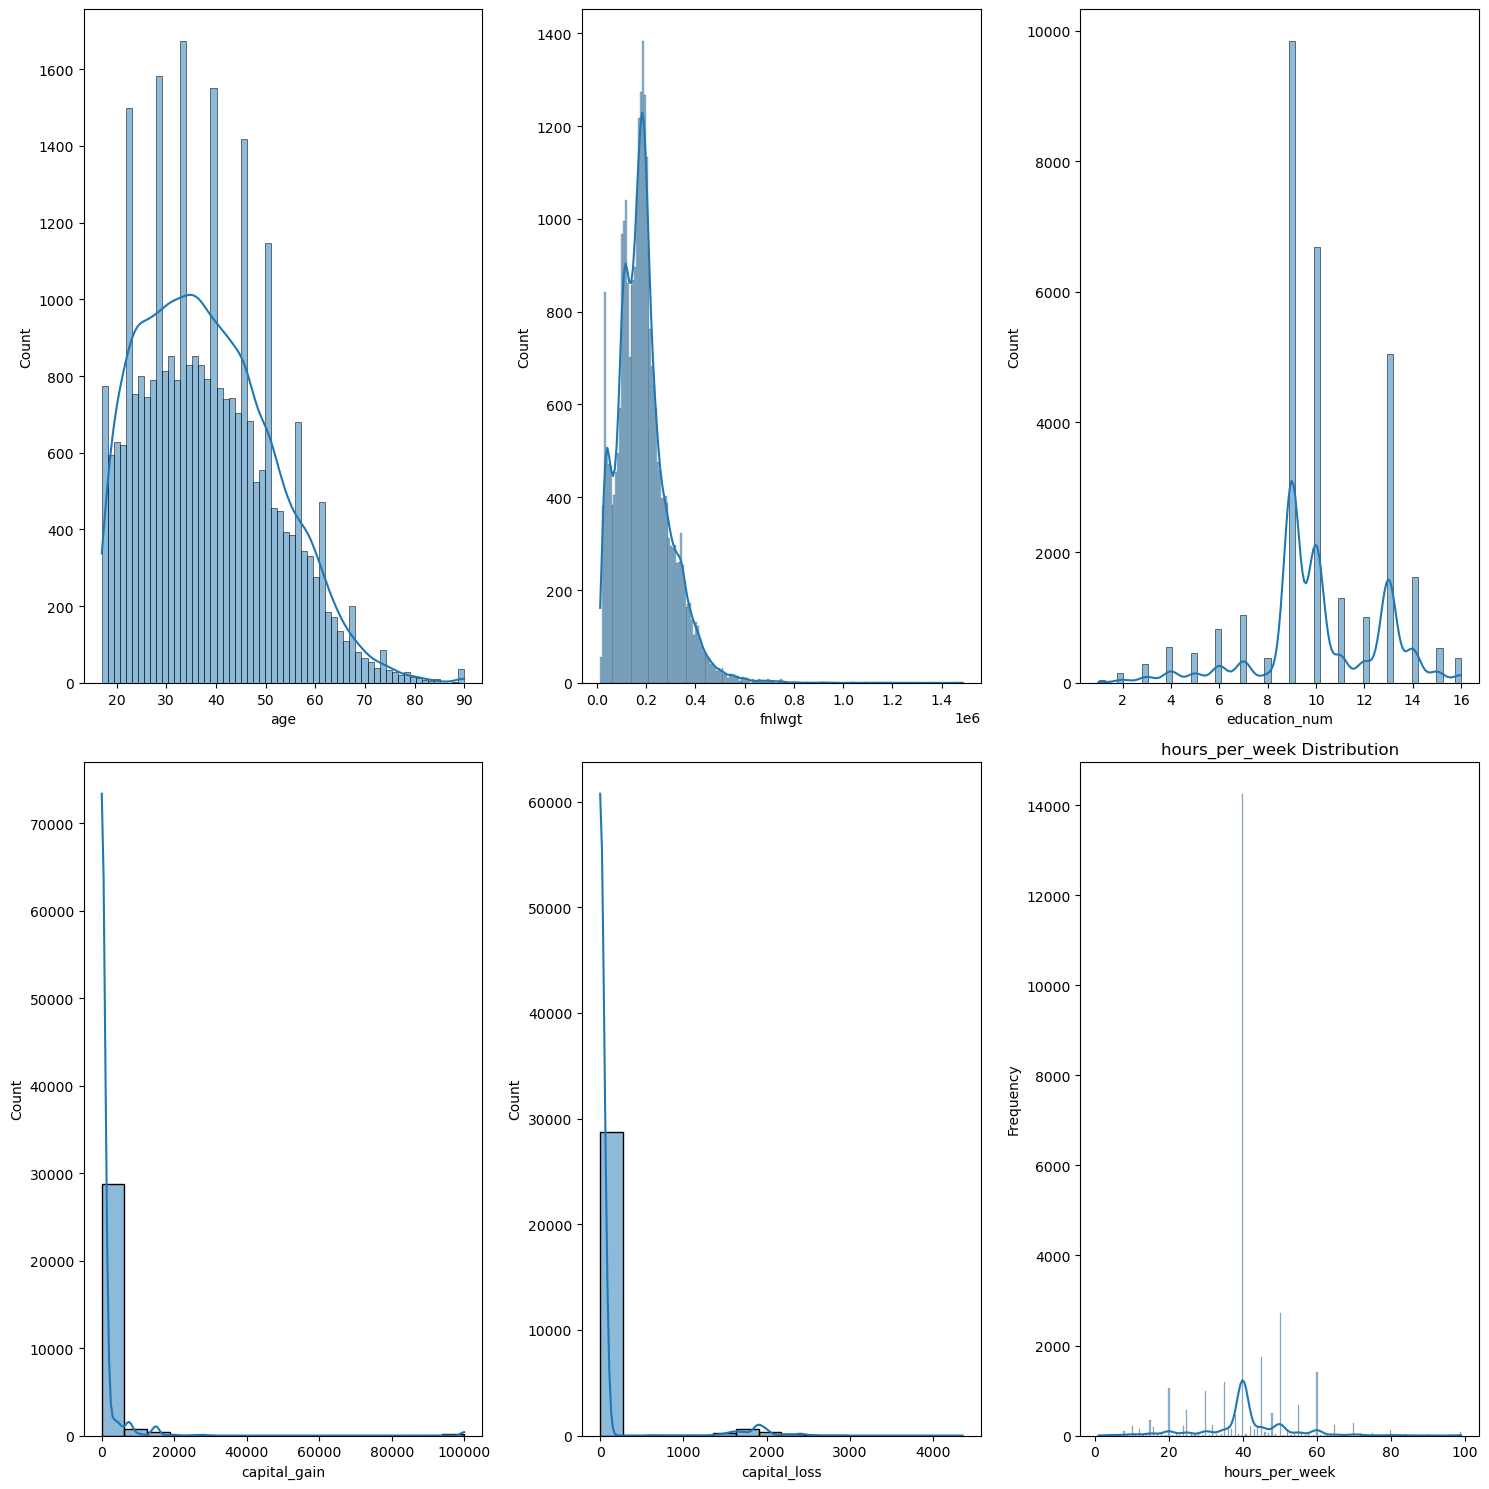

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  

columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    plot_frequency_distribution(column, axes[row, col])
plt.tight_layout()
plt.show()





In [18]:
def plot_distribution(dataframe, column, ax, bins=50):
    
    temp = pd.DataFrame({">50k":dataframe[dataframe["income"]==1][column],
                        "<=50k":dataframe[dataframe["income"]== 0][column]} )
    temp[["<=50k", ">50k"]].plot(kind='hist', ax=ax, bins=bins, stacked=True)

    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

    

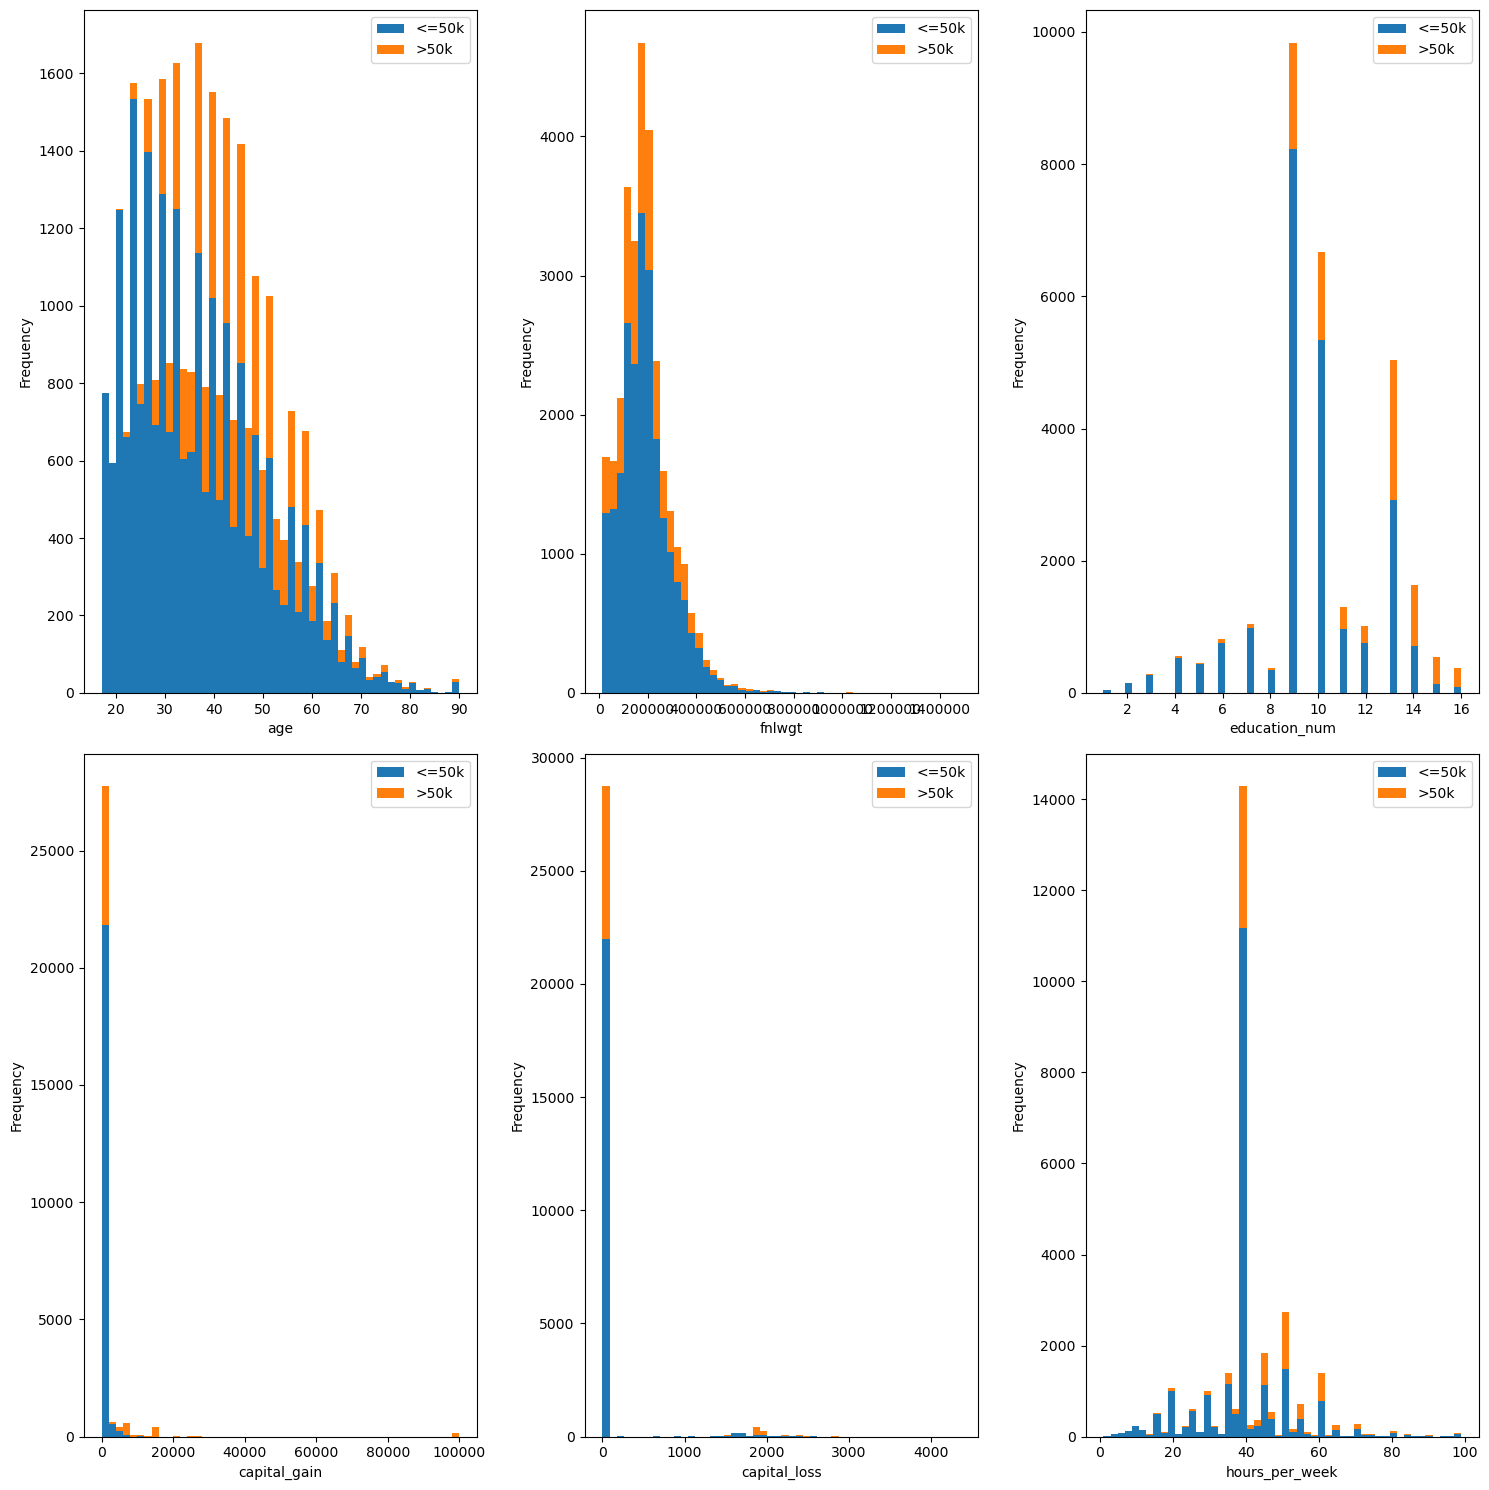

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  
columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    plot_distribution(df,column, axes[row, col])
plt.tight_layout()
plt.show()



In [20]:
def boxplot_plot(dataframe, column, ax):
    dataframe.boxplot(column = column, vert=False, ax=ax)
    ax.set_title(f"{column} distribution")
    

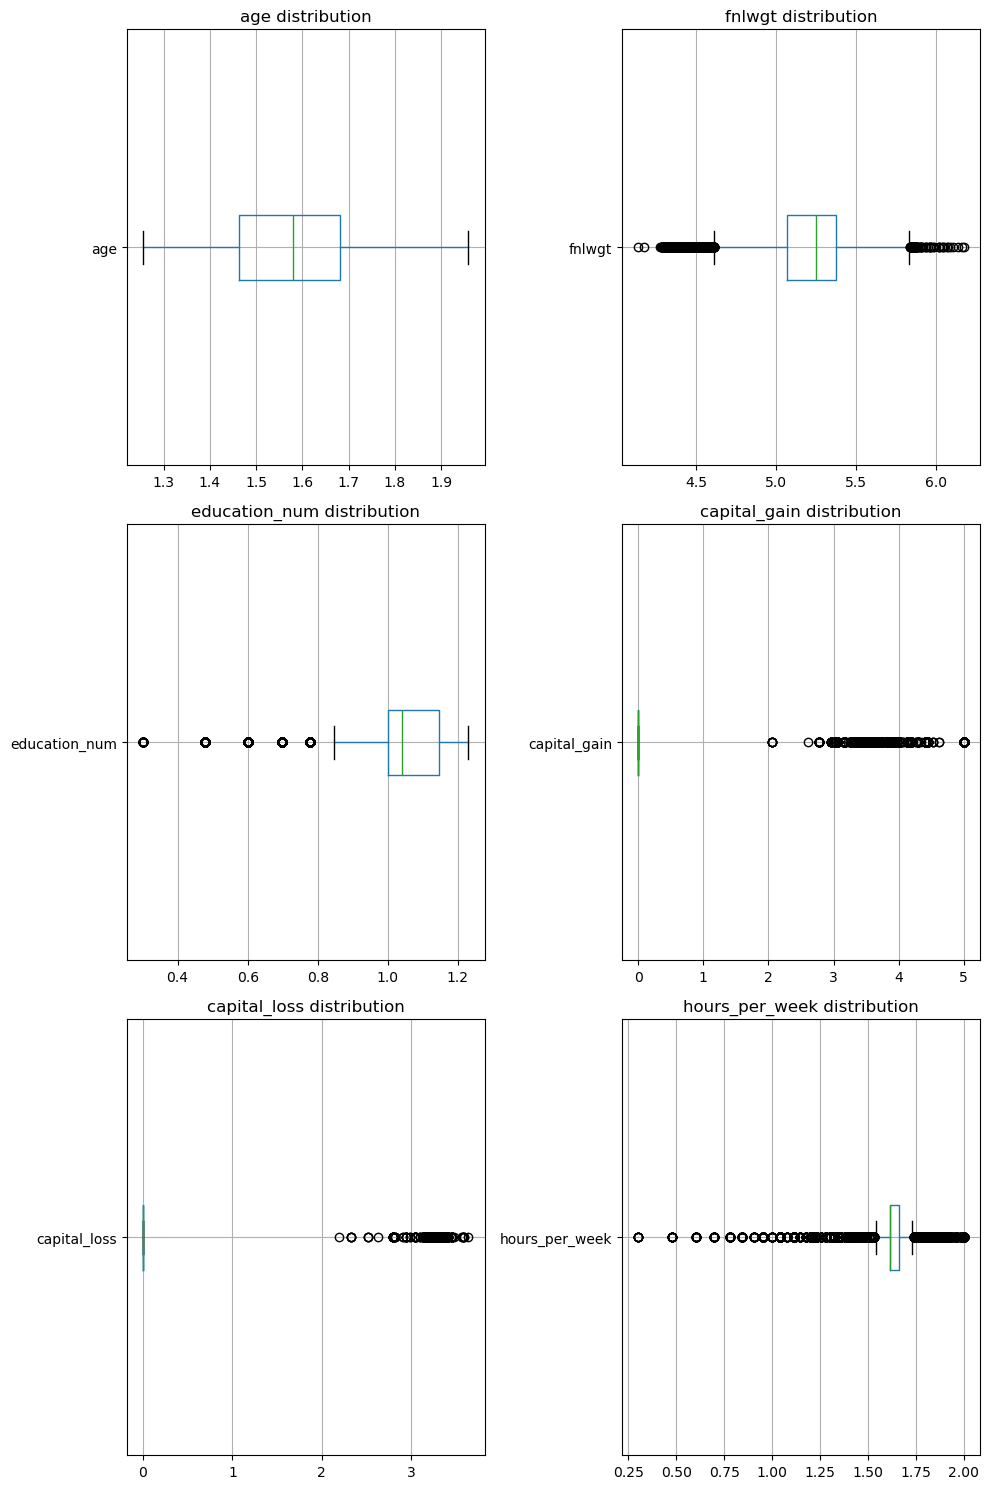

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  
columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    boxplot_plot(df,column, axes[row, col])
plt.tight_layout()
plt.show()


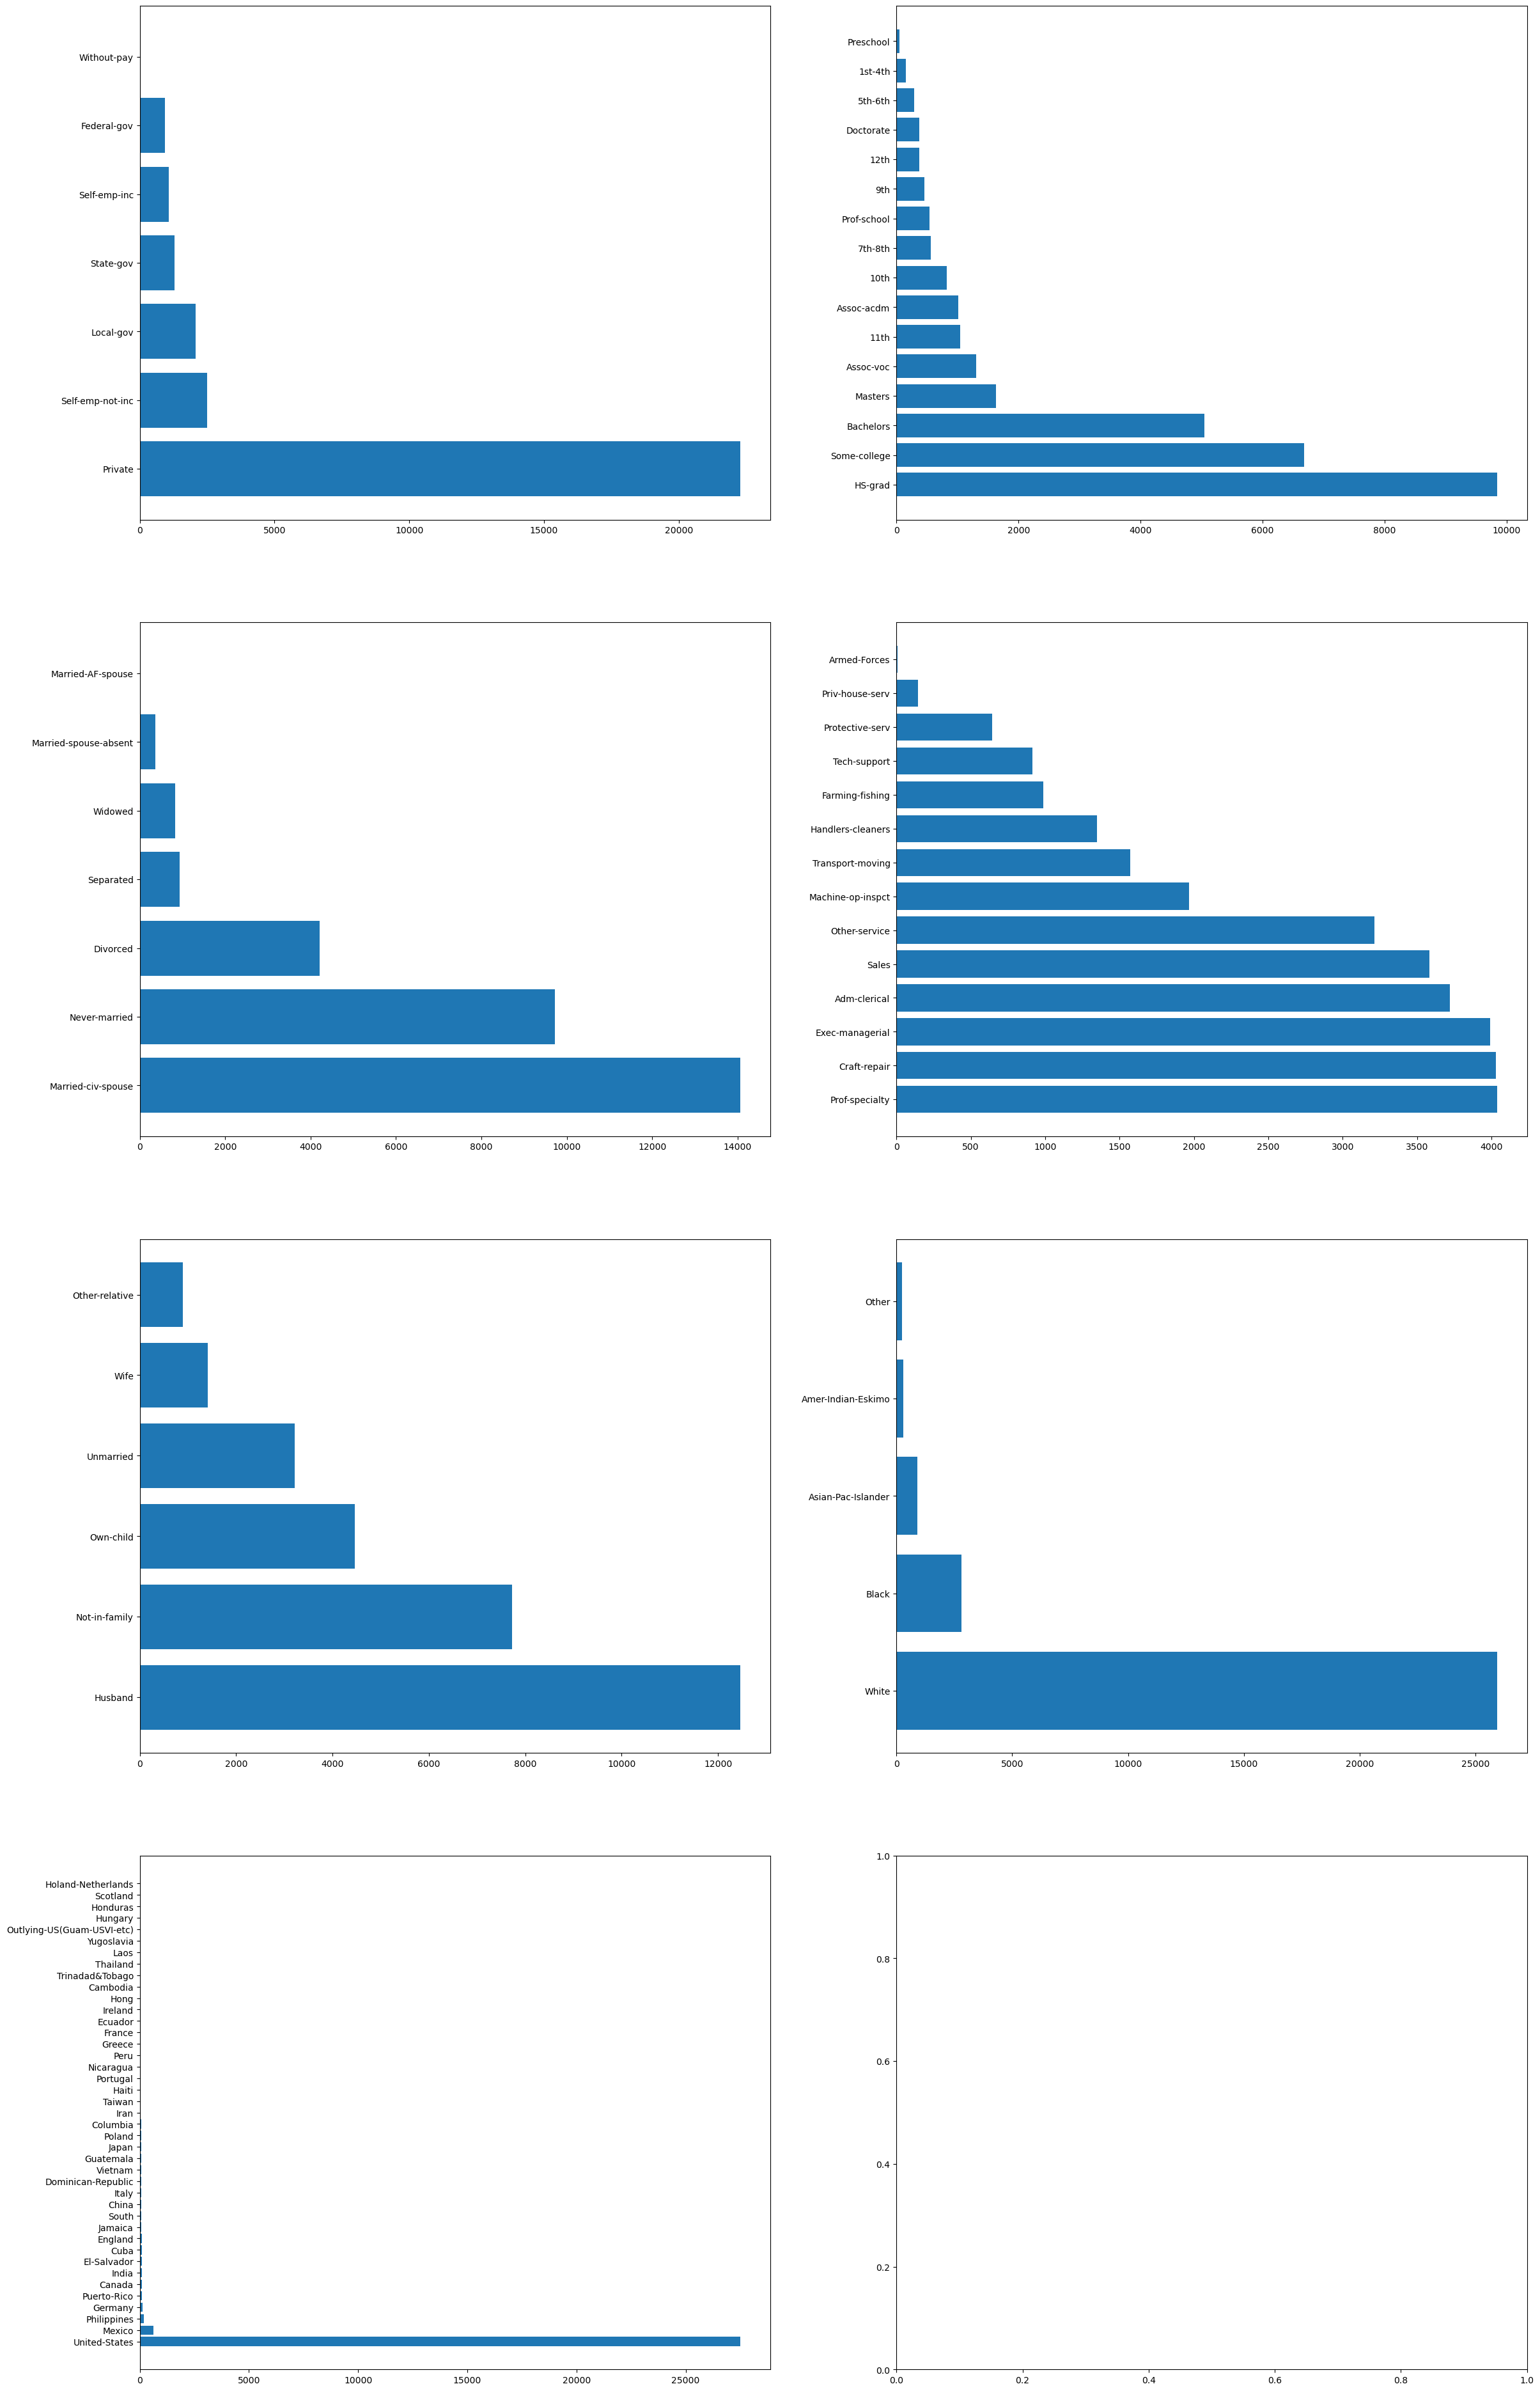

In [81]:
def plot_barh(column, ax):
    value_counts = df[column].value_counts()
    ax.barh(value_counts.index, value_counts.values, )

fig, axs = plt.subplots(4,2, figsize = (28, 48))

columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    plot_barh(column, axs[row, col])

plt.show()



The model will be biased to United states and race white because they are much higher than the other values in their columns

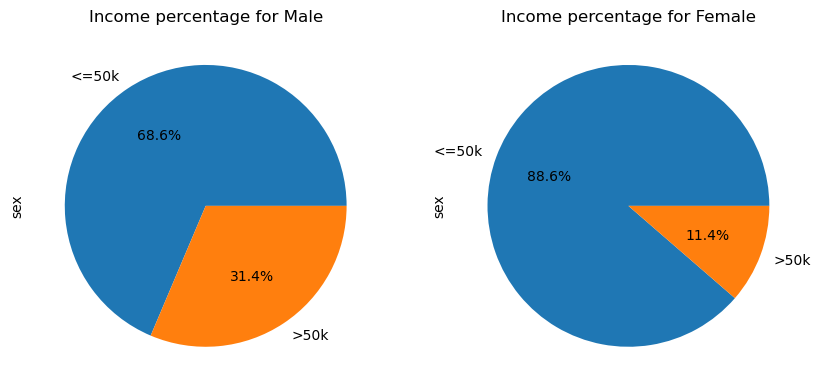

In [23]:
def plot_pie_chart(column, value, ax):
    temp =copy.deepcopy(df)
    temp['income'] =  temp['income'].replace(to_replace=[0,1], value=['<=50k', '>50k'])
    income_counts = temp[temp[column] == value]["income"].value_counts()
    income_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax )
    ax.set_title(f"Income percentage for {value}")
    ax.set_ylabel(column)

fig, axs = plt.subplots(ncols = 2, figsize=(10, 20))
plot_pie_chart('sex', 'Male', axs[0])
plot_pie_chart('sex', 'Female', axs[1])

##### Observations:
- The Percentage of Male with income more than 50k is higher than than the Female.


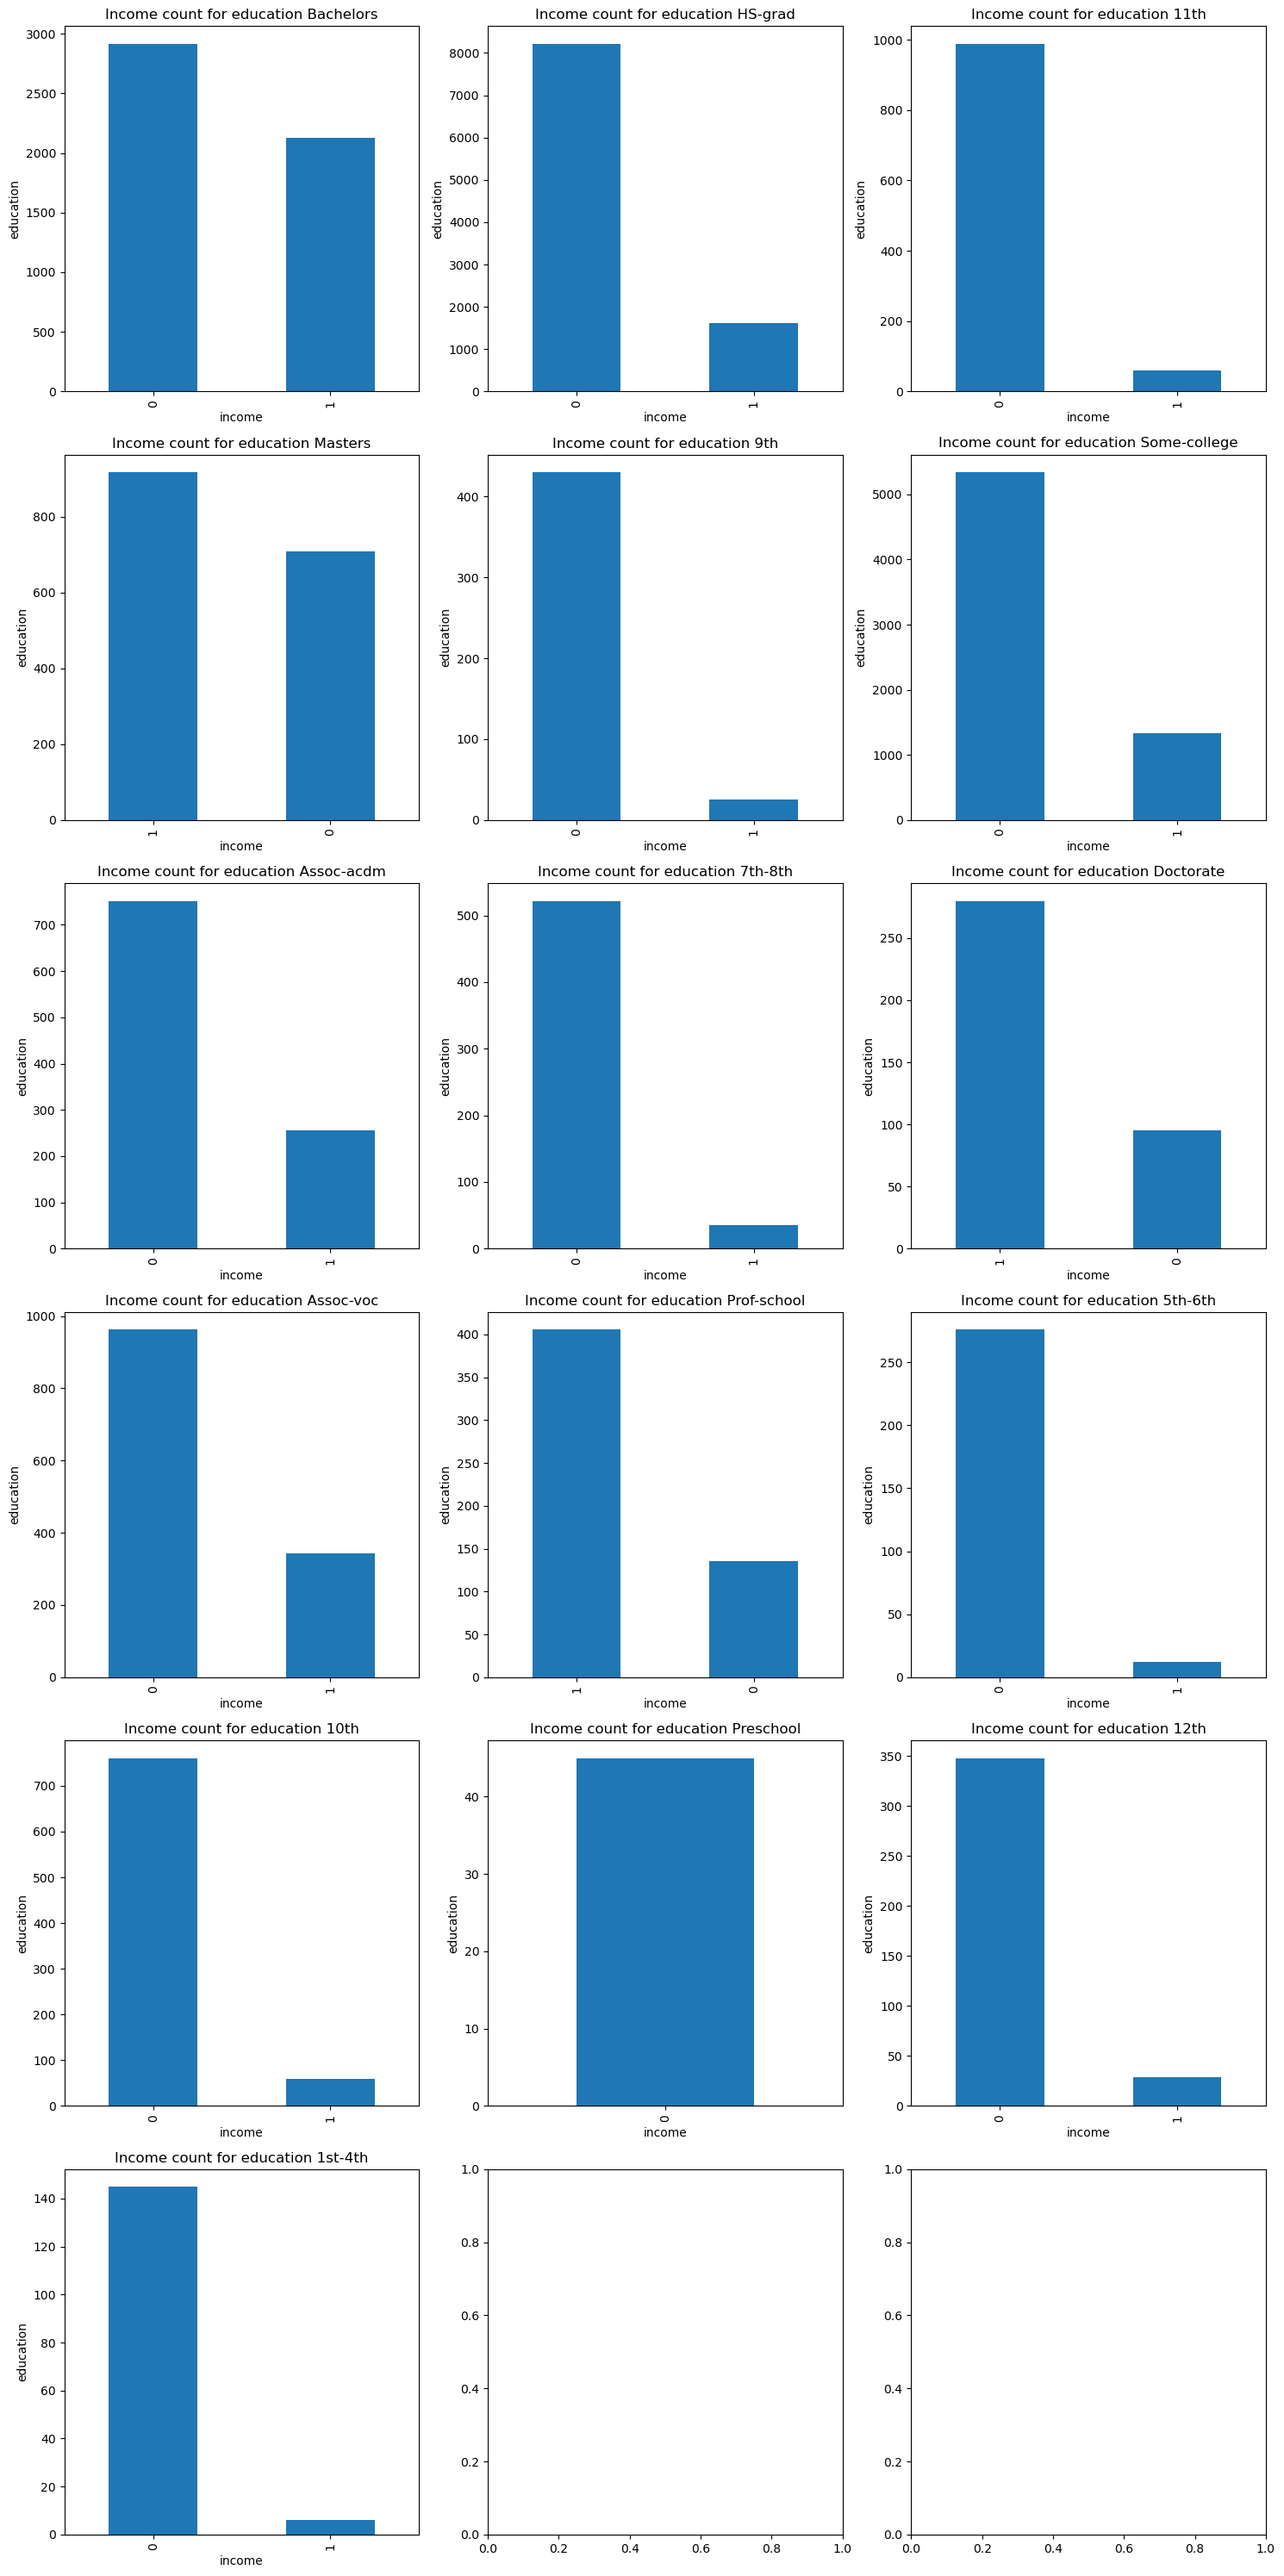

In [24]:
def plot_count_bar_char(column, value, ax):
    df[df[column]== value]['income'].value_counts().plot(kind='bar', ax= ax)
    ax.set_title(f"Income count for {column} {value}")
    ax.set_ylabel(column)


fig, axs = plt.subplots(nrows = 6, ncols=3, figsize=(15, 30))
educations = df['education'].unique()


for i, edu in enumerate(df['education'].unique()):
    row = i // 3
    col = i % 3
    plot_count_bar_char('education', edu, axs[row][col])

plt.tight_layout()
plt.show()



##### Observation
- When the education level increase the chance of having an income more than 50k increase.
- Lower education level increase the chance of having income less than 50k.


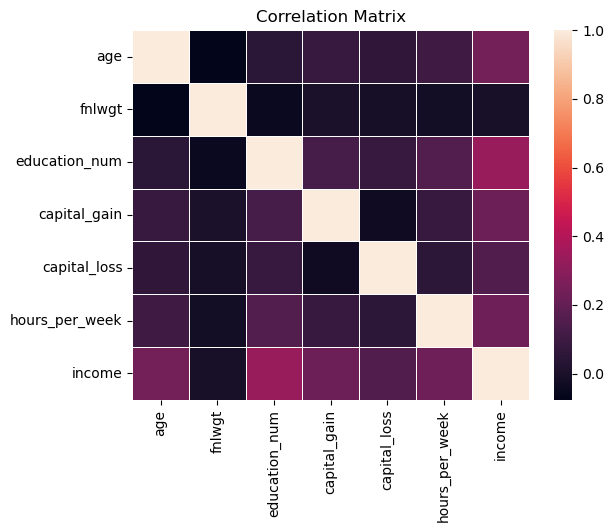

In [25]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
df['age'] = np.log10(df['age'] + 1)
df['fnlwgt'] = np.log10(df['fnlwgt'] + 1)
df['education_num'] = np.log10(df['education_num'] + 1)
df['capital_gain'] = np.log10(df['capital_gain'] + 1)
df['capital_loss'] = np.log10(df['capital_loss'] + 1)
df['hours_per_week'] = np.log10(df['hours_per_week'] + 1)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

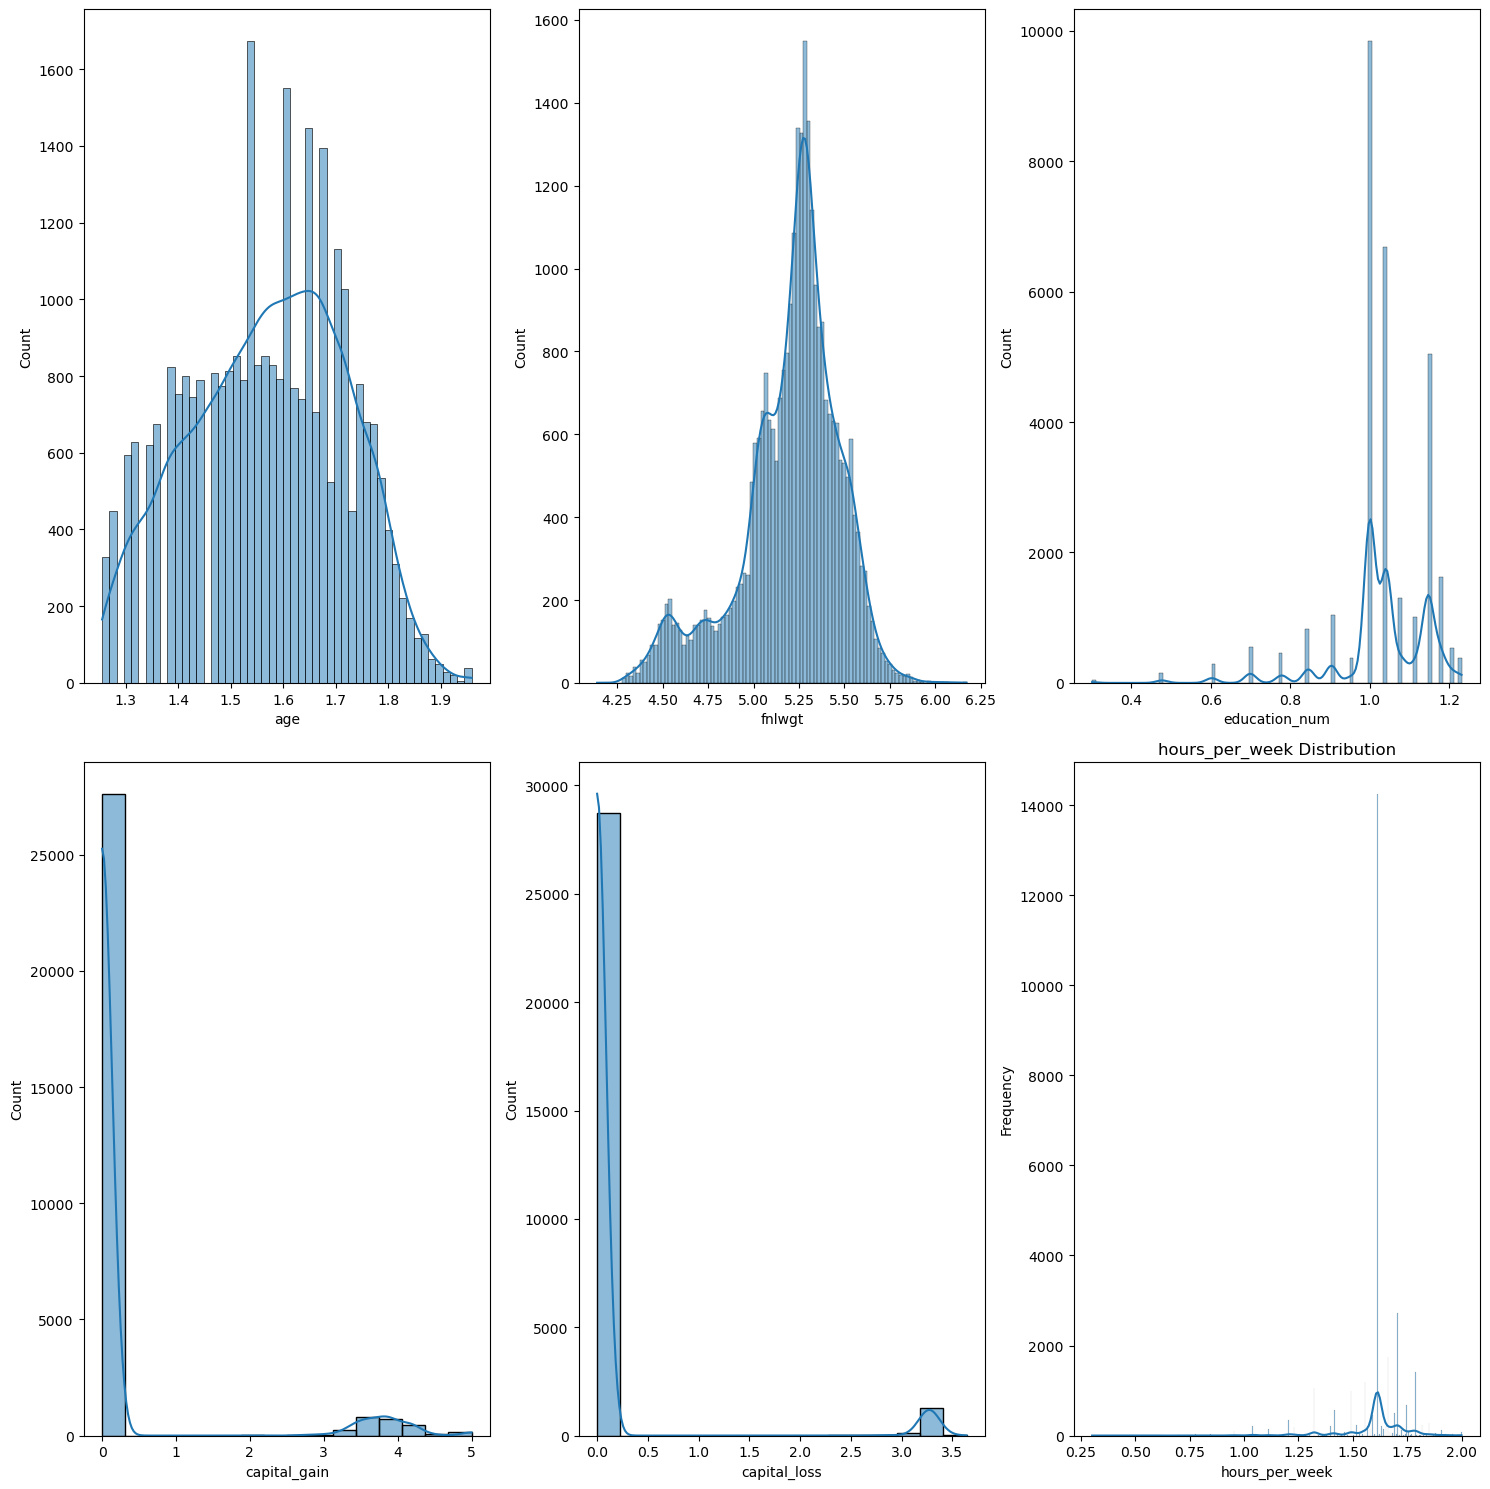

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  

columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    plot_frequency_distribution(column, axes[row, col])
plt.tight_layout()
plt.show()

In [28]:
new_df = pd.get_dummies(df, dtype=int)
new_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,1.602060,4.889397,1.146128,3.337459,0.0,1.612784,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.707570,4.920708,1.146128,0.000000,0.0,1.146128,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.591065,5.333743,1.000000,0.000000,0.0,1.612784,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.732394,5.370554,0.903090,0.000000,0.0,1.612784,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1.462398,5.529443,1.146128,0.000000,0.0,1.612784,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance


In [30]:
y = new_df['income']
X= new_df.drop(columns = ['income'])
print(X.shape)
print(y.shape)

(30162, 104)
(30162,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [33]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[5024  638]
 [ 683 1196]]


- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

In [34]:
precision_score = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)

print(f'precision score = {precision_score}')
print(f'recall_score = {recall}')

precision score = 0.6521264994547438
recall_score = 0.6365087812666312


In [35]:
cr = metrics.classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5662
           1       0.65      0.64      0.64      1879

    accuracy                           0.82      7541
   macro avg       0.77      0.76      0.76      7541
weighted avg       0.82      0.82      0.82      7541

